In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


In [42]:
# users = pd.read_csv("/home/exouser/HnMRecProject/data/customers.csv")
articles = pd.read_csv("/home/exouser/HnMRecProject/data/articles.csv")
transactions = pd.read_csv("/home/exouser/HnMRecProject/data/transactions_train.csv")

In [46]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [67]:
import matplotlib.pyplot as plt
X = pd.DataFrame(transactions.article_id.value_counts())
X[X['article_id']>5000]

,article_id
706016001,50287
706016002,35043
372860001,31718
610776002,30199
759871002,26329
...,...
446224002,5018
188183001,5017
570002002,5016
743098001,5007


In [66]:
1200/60/4

5.0

In [59]:
408/10500

0.038857142857142854

In [6]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [11]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [7]:
my_list = articles.columns.values.tolist()

In [8]:
my_list

['article_id',
 'product_code',
 'prod_name',
 'product_type_no',
 'product_type_name',
 'product_group_name',
 'graphical_appearance_no',
 'graphical_appearance_name',
 'colour_group_code',
 'colour_group_name',
 'perceived_colour_value_id',
 'perceived_colour_value_name',
 'perceived_colour_master_id',
 'perceived_colour_master_name',
 'department_no',
 'department_name',
 'index_code',
 'index_name',
 'index_group_no',
 'index_group_name',
 'section_no',
 'section_name',
 'garment_group_no',
 'garment_group_name',
 'detail_desc']

In [12]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [32]:
(articles['article_id'].nunique())

105542

In [7]:
articles_copy = articles.copy()

In [8]:
articles_copy

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [9]:
articles_copy.drop(columns=['product_code', 'prod_name', 'product_type_no', 'product_type_name',
                       'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code',
                       'colour_group_name','perceived_colour_value_id', 'perceived_colour_value_name',
                       'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 
                       'department_name', 'index_code', 'index_name', 'index_group_no', 'section_no', 
                       'section_name', 'garment_group_no', 'detail_desc'], inplace= True)

In [10]:
articles_copy.head()

,article_id,product_group_name,index_group_name,garment_group_name
0,108775015,Garment Upper body,Ladieswear,Jersey Basic
1,108775044,Garment Upper body,Ladieswear,Jersey Basic
2,108775051,Garment Upper body,Ladieswear,Jersey Basic
3,110065001,Underwear,Ladieswear,"Under-, Nightwear"
4,110065002,Underwear,Ladieswear,"Under-, Nightwear"


In [11]:
articles_copy.isnull().sum()

article_id            0
product_group_name    0
index_group_name      0
garment_group_name    0
dtype: int64

In [12]:
articles_copy = pd.get_dummies(articles_copy, columns=['product_group_name', 'index_group_name', 'garment_group_name'])
articles_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 46 columns):
 #   Column                                            Non-Null Count   Dtype
---  ------                                            --------------   -----
 0   article_id                                        105542 non-null  int64
 1   product_group_name_Accessories                    105542 non-null  uint8
 2   product_group_name_Bags                           105542 non-null  uint8
 3   product_group_name_Cosmetic                       105542 non-null  uint8
 4   product_group_name_Fun                            105542 non-null  uint8
 5   product_group_name_Furniture                      105542 non-null  uint8
 6   product_group_name_Garment Full body              105542 non-null  uint8
 7   product_group_name_Garment Lower body             105542 non-null  uint8
 8   product_group_name_Garment Upper body             105542 non-null  uint8
 9   product_group_name_Garment

In [13]:
articles_copy.head()

,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,108775015,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,108775044,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,108775051,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,110065001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,110065002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
articleid = input('Article ID: ')
article = articles.index[articles['article_id'] == int(articleid)]
article

Int64Index([0], dtype='int64')

In [15]:
y = np.array(articles_copy.loc[article])
# Need to reshape so it can be passed into cosine_sim function
y = y.reshape(1, -1)
y

array([[108775015,         0,         0,         0,         0,         0,
                0,         0,         1,         0,         0,         0,
                0,         0,         0,         0,         0,         0,
                0,         0,         0,         0,         1,         0,
                0,         0,         0,         0,         0,         0,
                1,         0,         0,         0,         0,         0,
                0,         0,         0,         0,         0,         0,
                0,         0,         0,         0]])

In [16]:
cos_sim = cosine_similarity(articles_copy, y)
# Create a dataframe with similairty scores with article ID ('article_id') as index
cos_sim = pd.DataFrame(data=cos_sim, index=articles_copy.index)
cos_sim

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
105537,1.0
105538,1.0
105539,1.0
105540,1.0


In [62]:
def article_recommend(title):
    
    # title = input('Article ID: ')
    # print(title)
    article = articles.index[articles['article_id'] == int(title)]
    # n_recs = int(input('How many recommendations? '))
    
    y = np.array(articles_copy.loc[article]).reshape(1, -1)
    cos_sim = cosine_similarity(articles_copy, y)
    cos_sim = pd.DataFrame(data=cos_sim, index=articles_copy.index)
    cos_sim.sort_values(by = 0, ascending = False, inplace=True)
    print(cos_sim)
    results = cos_sim.index.values[1:11]
    results_df = articles.loc[results]
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'prod_name':'Product Name','product_type_name':'Product Type Name', 'product_group_name':'Product Group Name',
                               'index_group_name':'Index Group Name', 'garment_group_name':'Garment Group Name'}, inplace=True)
    results_df = results_df[['article_id']]
    results_df['original_article'] = title
    return results_df

In [63]:
dummy = pd.DataFrame(columns=['original_article','article_id'])
for i in articles_copy.article_id:
    print(i)
    dummy = pd.concat([dummy,article_recommend(953763001)], axis = 0)
    break

108775015
          0
0       1.0
70358   1.0
70368   1.0
70367   1.0
70366   1.0
...     ...
35177   1.0
35176   1.0
35175   1.0
35174   1.0
105541  1.0

[105542 rows x 1 columns]


In [61]:
dummy

,original_article,article_id
0,953763001,760158001
1,953763001,760214002
2,953763001,760208001
3,953763001,760195006
4,953763001,760195005
5,953763001,760195004
6,953763001,760195003
7,953763001,760195002
8,953763001,760195001
9,953763001,760184002


In [23]:
x = np.array([[0,0,0,0, 1],[1,0,0,0, 1]])
y = np.array([[0,0,0,0,1]])
from sklearn.metrics import jaccard_score
cosine_similarity(x, y)

array([[1.        ],
       [0.70710678]])

In [87]:
cos_sim.iloc[:, 0].unique()

array([1.])

In [102]:
jaccard_score(np.array(articles_copy[articles_copy['article_id']==110065001])[0][1:],np.array(articles_copy[articles_copy['article_id']==956217002])[0][1:]
)

0.2

In [17]:
ex = articles_copy.T

In [18]:
ex.columns = (list(ex.iloc[0, :]))

In [19]:
ex.drop('article_id', axis = 0, inplace = True)

In [20]:
ex.head()

,108775015,108775044,108775051,110065001,110065002,110065011,111565001,111565003,111586001,111593001,...,949594001,950449002,952267001,952937003,952938001,953450001,953763001,956217002,957375001,959461001
product_group_name_Accessories,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
product_group_name_Bags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
product_group_name_Cosmetic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
product_group_name_Fun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
product_group_name_Furniture,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def findJaccSim(title, num_recs = 10):
    
    dummy_dict = {'recomm' : list(ex.columns), 'score':[]}
    for col in dummy_dict['recomm']:

        dummy_dict['score'].append(jaccard_score(ex[col], ex[title]))
    
    jac_sim = pd.DataFrame(dummy_dict)
    del dummy_dict
    jac_sim['original'] = title
    jac_sim.sort_values(by='score', ascending = False, inplace = True)
    return jac_sim.iloc[:,:]

In [32]:
a = findJaccSim(108775015)

<AxesSubplot: >

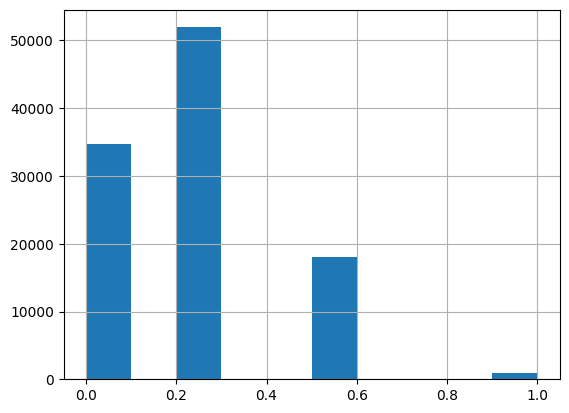

In [34]:
a.score.hist()

In [40]:
from heapq import heapify, heappush, heappushpop, heappop

columns = list(ex.columns)
exnp = np.array(ex)
def findJaccSim2(title, columns, num_recs = 10):
    
    sims = []
    ctr = 0
    titleIdx = columns.index(title)
    vec = exnp[:,titleIdx ]
    for idx, col in enumerate(columns):
        if idx == titleIdx:
            continue
        # dummy_dict[col].append(jaccard_score(ex[col], ex[title]))
        if ctr == num_recs:
            heappushpop(sims, (jaccard_score(vec, exnp[:, idx]), col))
        else:
            heappush(sims, (jaccard_score(vec, exnp[:, idx]), col))
            ctr += 1

    res = {'original':[],'rec':[], 'score':[]}
    while sims:
        x, y = heappop(sims)
        res['rec'].append(y)
        res['score'].append(x)
        res['original'].append(title)

    return res




    


In [41]:
findJaccSim2(108775015, columns)

{'original': [108775015,
  108775015,
  108775015,
  108775015,
  108775015,
  108775015,
  108775015,
  108775015,
  108775015,
  108775015],
 'rec': [921266001,
  921266005,
  921266006,
  921266007,
  925509001,
  928461001,
  928461002,
  928461003,
  934296001,
  944989001],
 'score': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}